**Probability Ratio Encoding**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('train.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
df['Cabin'].fillna("Missing",inplace=True)
df.head()

/tmp/ipython-input-2981415472.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna("Missing",inplace=True)


,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [ ]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [ ]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [ ]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [ ]:
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [ ]:
prob_df['Died'] = 1-prob_df['Survived']

In [ ]:
prob_df.head()

,Survived,Die,Died
Cabin,,,
A,0.466667,0.533333,0.533333
B,0.744681,0.255319,0.255319
C,0.593220,0.406780,0.406780
D,0.757576,0.242424,0.242424
E,0.750000,0.250000,0.250000


In [ ]:
prob_df.drop(['Die'],axis=1)

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [ ]:
prob_df['probability_ratio'] = prob_df['Survived']/prob_df['Died']

In [ ]:
probability_encoded = prob_df['probability_ratio'].to_dict()

In [ ]:
df['cabin_encoded'] = df['Cabin'].map(probability_encoded)
df.head()

,Survived,Cabin,cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


1.Probability of survived based on cabin -- categorical feature

2.probability of not survived -- 1-(survived)

3.divide both the quantites

4.create a dictionary and map with the cabin categorical features

**Transformation of Features**

**Why Transformation of features is required??

*   Linear Regression---Gradient Descent---Global Minima
*   Algorithms like KNN,K Means,Hierarchical clustering---Euclidean Distance
*   Logistic regression
*   DT,Random Forest,XGBoost,AdaBoost don't require transformation beacause they form trees and internally nodes are increasing based on values not on magnitudes.
*   Every point is a vector which magnitude and direction
*   Deep learning also requires transformation
ANN--->Gradient Descent,Global Minima
CNN--->each image is (0-255)pixel we scale it to 0 or 1
RNN

**Types of Transformation**

1.Normalization and Standardization

2.Scaling to Minimum and Maximum

3.Scaling to Median and Quantiles

4.Gaussian Transformation

* Logarithamic Tranformation   
* Reciprocal Tranformation  
* Square Root Transformation
* Exponential Transformation
* Box Cox Transformation  





**Standardization**

we try to bring all the features to a similar scale and also it means centering the variable at zero

z = (x-x_mean)/std


In [5]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [6]:
import pandas as pd
df = pd.read_csv('train.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

ValueError: Usecols do not match columns, columns expected but not found: ['Fare', 'Survived', 'Pclass', 'Age']

In [ ]:
df['Age'].fillna(df.Age.median(),inplace=True)

/tmp/ipython-input-895894048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.Age.median(),inplace=True)


np.float64(0.0)

In [ ]:
df.isnull().mean()

,0
Survived,0.0
Pclass,0.0
Age,0.0
Fare,0.0


standardisation : we use the StandardScaler from sklearn library

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**fit vs fit_transform**

use fit only for ML algorithms if an algorithm is used to transform data then only use fit_transform

In [ ]:
df_scaled = scaler.fit_transform(df)

In [ ]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [ ]:
pd.DataFrame(df_scaled,columns=df.columns)

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

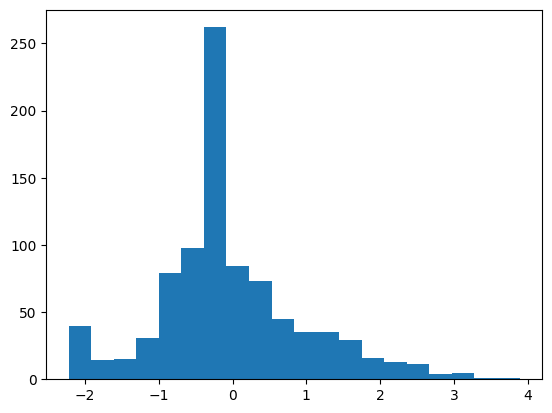

In [ ]:
plt_his = plt.hist(df_scaled[:,2],bins=20)


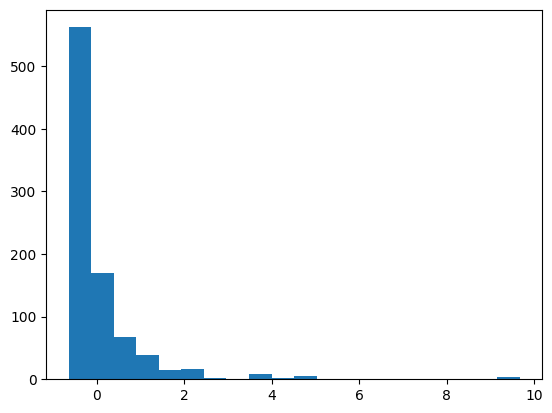

In [ ]:
plt_his = plt.hist(df_scaled[:,3],bins=20)
#right skewed

**Min Max Scaling**

widely used in DL(CNN)

scales the values bewtween 0 to 1

X_scaled = (X-X.min)/(X.max-X.min)

In [ ]:
from sklearn .preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [ ]:
df_scaled = min_max.fit_transform(df)

In [ ]:
df_scaled

array([[0.        , 1.        , 0.27117366, 0.01415106],
       [1.        , 0.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [0.        , 1.        , 0.34656949, 0.04577135],
       [1.        , 0.        , 0.32143755, 0.0585561 ],
       [0.        , 1.        , 0.39683338, 0.01512699]])

In [ ]:
df_minmax = pd.DataFrame(df_scaled,columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

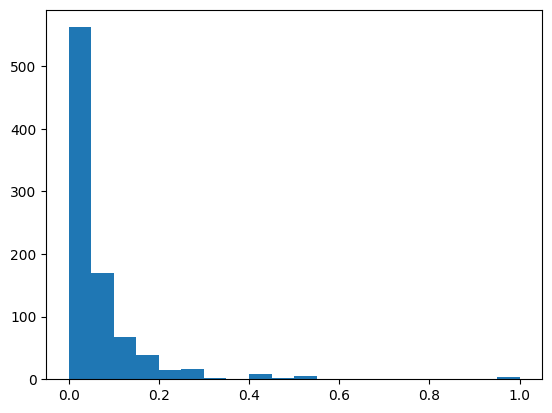

In [ ]:
plt.hist(df_minmax['Fare'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

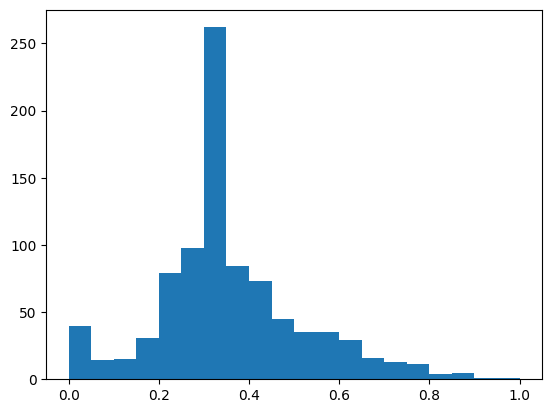

In [ ]:
plt.hist(df_minmax['Age'],bins=20)

**Robust Scaler**(Robust to Outliers)

It is used to scale the feature to median and quantiles

Scaling uses median and quantiles consists of subtracting the median to all the observations and then dividing by the interquantile difference.The interquartile difference is the difference between 75th and the 25th quantile:

IQR = 75TH Quantile - 25TH Quantile

X_Scaled = (X - X.Median)/IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile and 90% of all the values are less than 9

5-50 percentile and 50% of all the values are less than 5

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
X_Scaled = RobustScaler()

In [ ]:
df_scaled = X_Scaled.fit_transform(df)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
df_robust_scaler = pd.DataFrame(df_scaled,columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.335664,-0.312011
1,1.0,-2.0,0.559441,2.461242
2,1.0,0.0,-0.111888,-0.282777
3,1.0,-2.0,0.391608,1.673732
4,0.0,0.0,0.391608,-0.277363


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

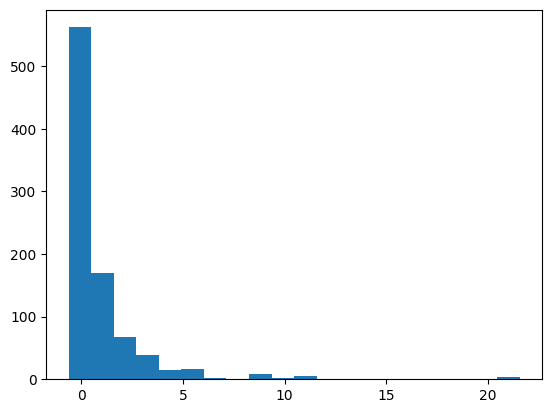

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_robust_scaler['Fare'],bins=20)

**Gaussian Distribution**

Some algorithms like Linear and Logistiic assume that the data is normally distributed

-imporoves Accuracy and performance

So we use

Logarithamic Tranformation

Reciprocal Tranformation

Square Root Transformation

Exponential Transformation

Box Cox Transformation

Yeo-johnson Transformation

to transform data into normal

In [44]:

import pandas as pd
df = pd.read_csv('train (2).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [12]:
import scipy.stats as stats
import pylab

In [14]:
# if we want to check whether the feature is gaussian distributed or not then use Q-Q plot
def plot_data(df,feature):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(1,2,2)
  stats.probplot(df[feature],dist='norm',plot=pylab)
  plt.show()

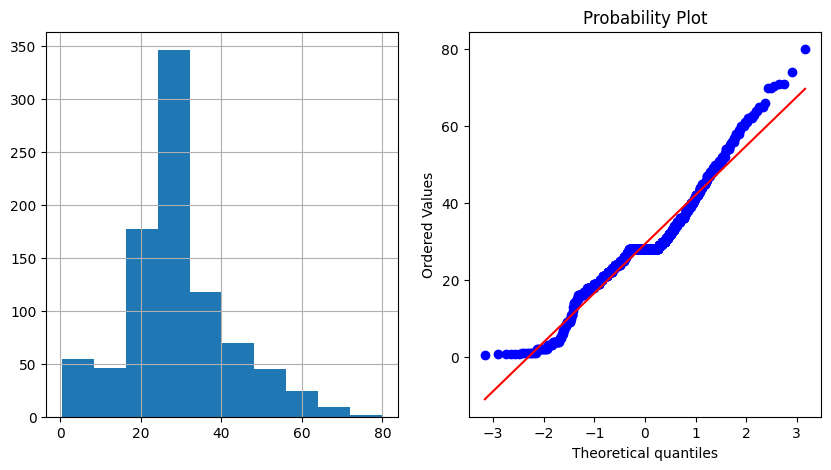

In [19]:
plot_data(df,'Age')  #if all the points are falling under the straight line then feature is gaussian distributed

**Logarithamic Transformation**

-> Works better when data is left-skewed or right skewed

In [20]:
import numpy as np
df['Age_log'] = np.log(df['Age'])

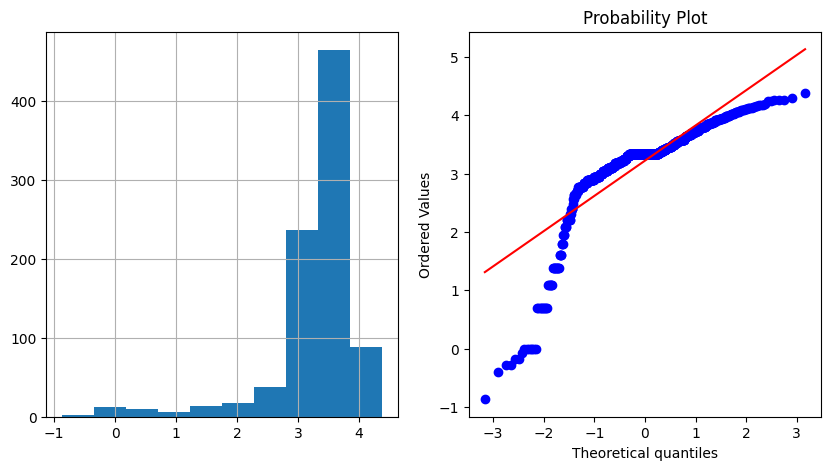

In [21]:
plot_data(df,'Age_log')

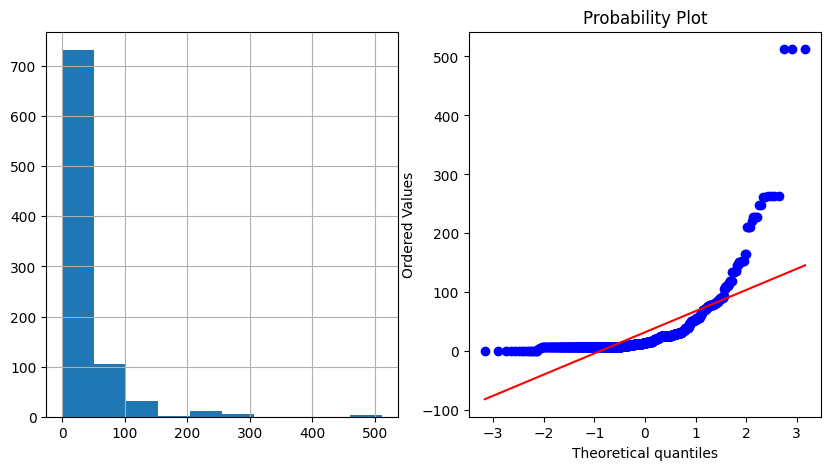

In [24]:
plot_data(df,'Fare')

In [33]:
df['Fare_log'] = np.log1p(df['Fare']) ##fare has zero values cause log(0) = infinity

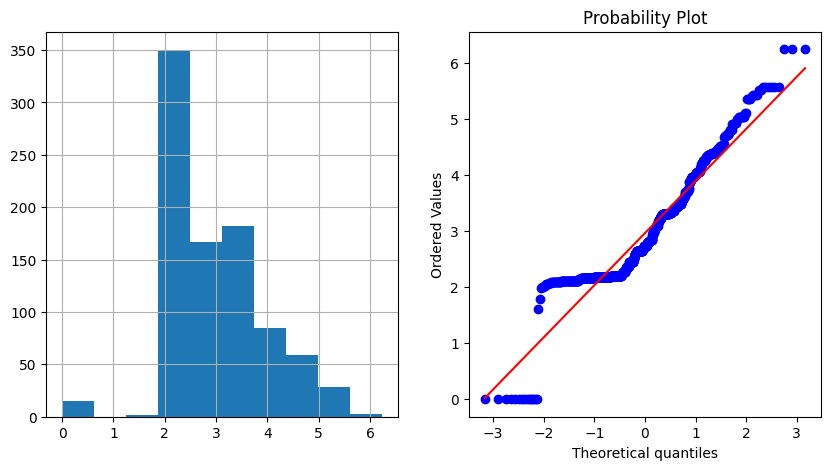

In [35]:
plot_data(df,'Fare_log')

**Reciprocal Transformation**

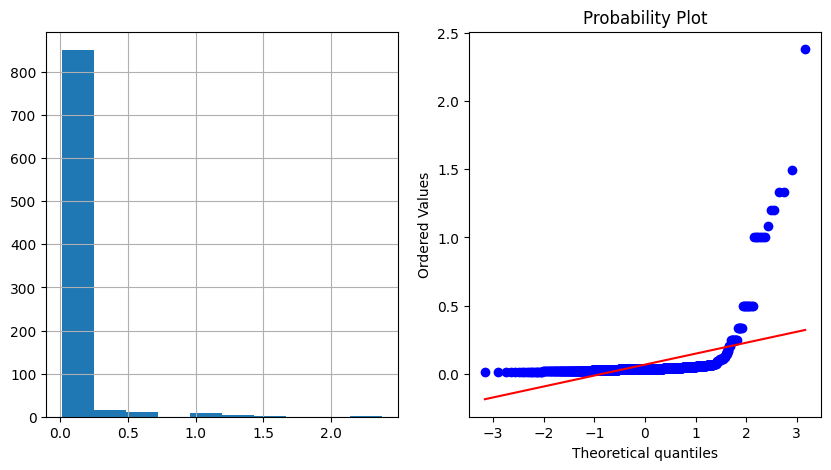

In [25]:
df['Age_reciprocal'] = 1/df.Age
plot_data(df,'Age_reciprocal')

**Square Root Transformation**

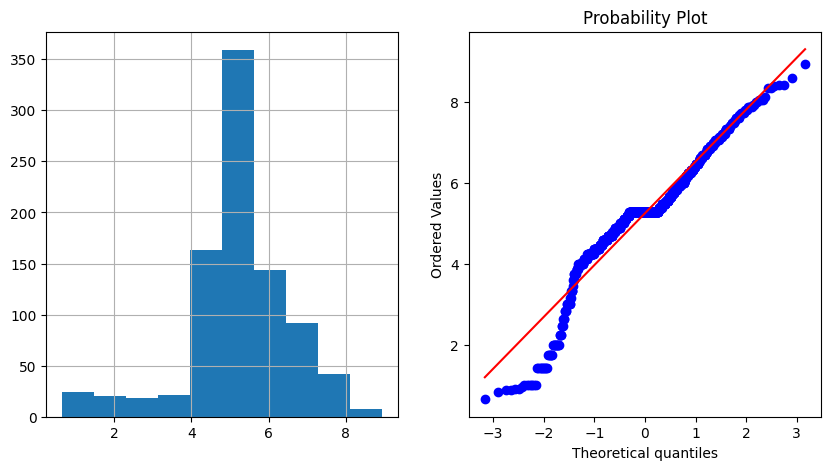

In [26]:
df['Age_square'] = df.Age**(1/2)
plot_data(df,'Age_square')

**Power Transformation**

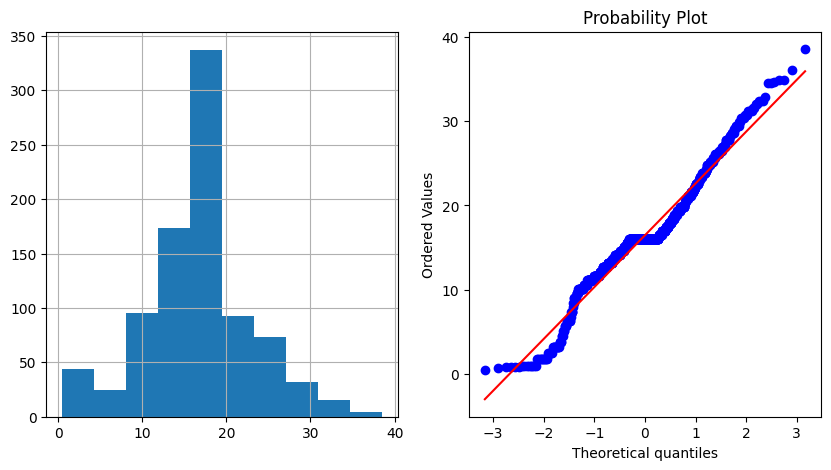

In [27]:
df['Age_power'] = df.Age**(1/1.2)
plot_data(df,'Age_power')

In [17]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (3).csv


In [18]:
import pandas as pd
df = pd.read_csv('train (2).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df['Age_exponential'] = np.exp(df['Age'])

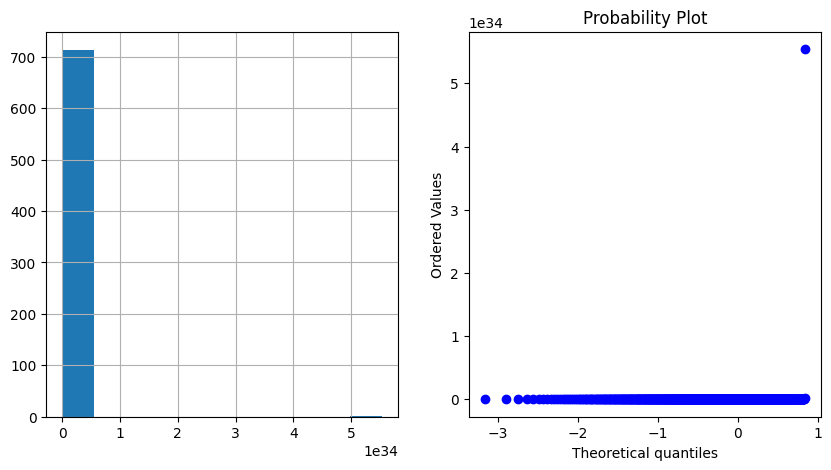

In [20]:
plot_data(df,'Age_exponential')

**BoxCox Transformation**

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

-> works only for strictly positive values

->

In [23]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [26]:
df['Age_Boxcox'],parameters = stats.boxcox(df['Age'])

In [30]:
print(parameters)

0.796453194094064


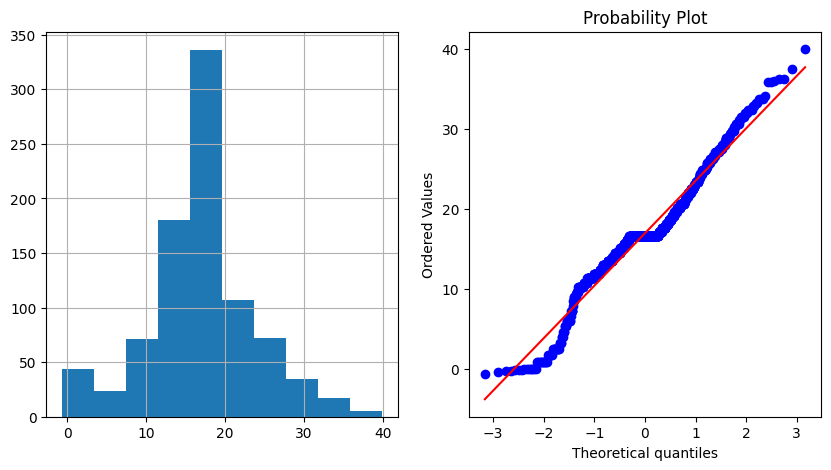

In [32]:
plot_data(df,'Age_Boxcox')

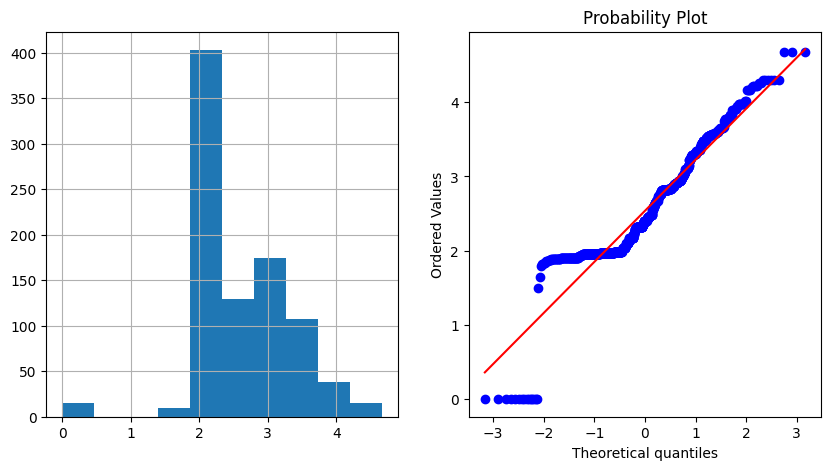

In [39]:
df['Fare_Boxcox'],parameters = stats.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')

**Yeo Johnson Transforamtion**

similar to Box-Cox but it works for both positive and negative values including zero.

an improved more flexible version of Box-Cox.

In [40]:
from sklearn.preprocessing import PowerTransformer

In [41]:
yeo = PowerTransformer(method='yeo-johnson')
df['Fare_yeo'] = yeo.fit_transform(df[['Fare']])

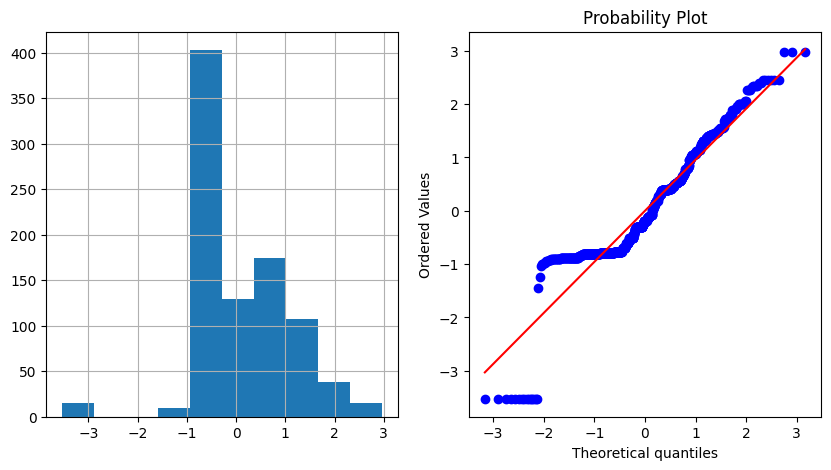

In [42]:
plot_data(df,'Fare_yeo')